# Import working libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import pandas_datareader as pdr

In [4]:
import datetime as dt

In [5]:
import matplotlib.pyplot as plt

In [6]:
import bs4 as bs
import pickle
import requests

In [7]:
import unicodedata as un 

# Conduct MC-Simulation of Visas stock price based on 2020 data

## Scrap stock data from Yahoo-Finance API

In [8]:
startdate=dt.datetime(2015,1,1)
enddate=dt.datetime(2020,12,31)

tickers="V"
data_stock=pdr.get_data_yahoo(tickers, start=startdate, end=enddate)
data_stock

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,66.687500,65.622498,65.845001,66.254997,8389600.0,63.475796
2015-01-05,65.875000,64.717499,65.872498,64.792503,12751200.0,62.074650
2015-01-06,65.195000,63.715000,64.947502,64.375000,11070000.0,61.674656
2015-01-07,65.285004,64.362503,64.610001,65.237503,9346800.0,62.500984
2015-01-08,66.279999,65.657501,65.800003,66.112503,10443200.0,63.339291
...,...,...,...,...,...,...
2020-12-24,208.820007,206.600006,206.639999,208.699997,3367900.0,208.699997
2020-12-28,213.460007,208.949997,209.850006,212.630005,5816200.0,212.630005
2020-12-29,215.240005,213.539993,214.610001,214.369995,6093400.0,214.369995


## Analyze the Visa stock

In [9]:
# calculate returns
stock=pd.DataFrame(data=data_stock["Close"].pct_change())
stock["Return"]=stock["Close"]
del stock["Close"]
stock=stock.dropna()
stock

,Return
Date,
2015-01-05,-0.022074
2015-01-06,-0.006444
2015-01-07,0.013398
2015-01-08,0.013413
2015-01-09,-0.014823
...,...
2020-12-24,0.016561
2020-12-28,0.018831
2020-12-29,0.008183


## Create a MC-Simulation function for data that is normally distributed

In [10]:
# time horizon
days=365
date=1/days

#drift
mu=stock.mean()

#shocks
sigma=stock.std()

def mcsimulation(start_price,days,mu,sigma):
    price=np.zeros(days)
    price[0]=start_price
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    for x in range(1, days):
        shock[x]=np.random.normal(loc=mu,scale=sigma)
        drift[x]=mu*date
        price[x]=price[x-1]+(price[x-1]*(drift[x]+shock[x]))
    return (price)

## Apply MC-Simulation function to generated data and simulate

In [11]:
start_price= data_stock["Close"].iloc[-1]
# for simplicity reasons only 10 runs are being conducted
runs=10
sim=np.zeros([days,runs])
for i in range(runs):
    sim[:,i]=mcsimulation(start_price, days, mu, sigma)
sim=pd.DataFrame(sim)
sim.columns=["1","2","3", "4","5","6", "7","8","9","10"]
sim

,1,2,3,4,5,6,7,8,9,10
0,218.729996,218.729996,218.729996,218.729996,218.729996,218.729996,218.729996,218.729996,218.729996,218.729996
1,214.305605,216.821693,220.618170,210.819429,214.068885,222.010172,226.248606,219.760675,218.284021,220.576720
2,215.598300,220.111314,225.561377,213.866948,216.487585,224.222382,229.549231,226.490239,218.521020,224.594730
3,215.916227,222.554070,221.349530,209.738994,213.189503,220.736218,230.274119,221.704115,219.442639,221.960548
4,210.686486,230.638516,217.589499,209.442982,211.903633,220.724932,232.720242,219.072200,220.397798,228.319205
...,...,...,...,...,...,...,...,...,...,...
360,230.326906,463.113010,333.034321,211.306757,364.694362,382.471600,227.785207,428.915787,234.756645,230.567153
361,228.951926,455.176471,336.569584,211.047736,363.976583,391.881283,229.614016,425.788798,230.812220,235.378297
362,226.732918,449.046748,339.255923,211.487908,362.227637,387.439968,232.362356,435.672408,228.701505,235.274123
363,239.716032,450.034128,345.954061,214.989110,362.037139,391.141054,233.444869,443.465741,223.500541,231.919030


## Look at desired results

Text(0.5, 1.0, 'MC Simulation')

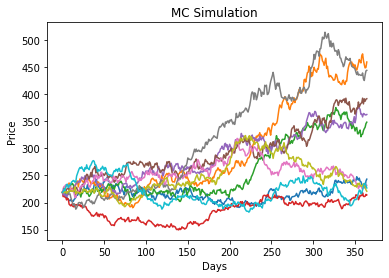

In [12]:
plt.plot(sim)   
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("MC Simulation")

## Create a JS file that can be used in HTML code

### Create the data variable

In [13]:
color=["rgb(28,146,46)","rgb(117,39,219)","rgb(247,27,27)",
       "rgb(255,51,255)","rgb(204,255,51)","rgb(51,249,255)",
       "rgb(247,27,27)","rgb(154,242,163)","rgb(218,187,31)",
       "rgb(139,171,213)"]

In [14]:
d={}
for i in range(len(sim.columns)):
  date=""
  price=""
  for j in range(len(sim.index)):
    date=date+"'"+str(sim.index[j])+"',"
    price=price+"'"+str(round(sim.values[j,i],2))+"',"
  d["script"+str(sim.columns[i])]= """var sim"""+str(sim.columns[i])+""" = {
            x: ["""+ date[:-1] + """],
            y: ["""+ price[:-1] +"""],
            mode: 'lines',
            name: 'Simulation """+ str(sim.columns[i])+"""',
            line: {
                color: '"""+color[i]+"""',
                width: 2,
                shape: 'spline',
                dot: false
            },           

            };"""

### Create a threshold line to visualize whether simulated stock price is above or beneath the stock price of the last trading day

In [15]:
price2= ("'209.01',")*364+"'209.01'"

In [16]:
d["script11"]= """var sim11 = {
            x: ["""+ date[:-1] + """],
            y: ["""+ price2 +"""],
            mode: 'lines',
            name: 'Initial price threshold',
            line: {
                color: 'rgb(0,0,0)',
                width: 2,
                shape: 'spline'
            },           

            };"""

### Create the layout variable and the rest of the JS script

In [17]:
final=d["script1"]+d["script2"]+d["script3"]+d["script4"]+d["script5"]+d["script6"]+d["script7"]+d["script8"]+d["script9"]+d["script10"]+d["script11"]+"""var data = [sim1, sim2, sim3, sim4, sim5, sim6, sim7, sim8, sim9, sim10, sim11];

var layout ={
            title: 'Monte Carlo Simulation',
            xaxis: {
            title: 'Days',
            autorange: true,
            tickangle: 45,
            tickfont: {
              family: 'Old Standard TT, serif',
              size: 14,
              },
            exponentformat: 'e',
            showexponent: 'all'
            },
            yaxis: {
            title: 'Predicted price',
            autorange: true,
            autotick: true,
            showticklabels: true,
            tickangle: 'auto',
            tickfont: {
              family: 'Old Standard TT, serif',
              size: 14,
              },
            exponentformat: 'e',
            showexponent: 'all'
            }
            };

Plotly.newPlot('myViz4', data, layout);"""

### write JS file

In [18]:
file=open("montec.js", "w")
file.write(final)
file.close()